___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Pandas Built-in Data Visualization

In this lecture we will learn about pandas built-in capabilities for data visualization! It's built-off of matplotlib, but it baked into pandas for easier usage!  

Let's take a look!

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## The Data

There are some fake data csv files you can read in as dataframes:

In [2]:
df1 = pd.read_csv('df1',index_col=0)
df2 = pd.read_csv('df2')

## Style Sheets

Matplotlib has [style sheets](http://matplotlib.org/gallery.html#style_sheets) you can use to make your plots look a little nicer. These style sheets include plot_bmh,plot_fivethirtyeight,plot_ggplot and more. They basically create a set of style rules that your plots follow. I recommend using them, they make all your plots have the same look and feel more professional. You can even create your own if you want your company's plots to all have the same look (it is a bit tedious to create on though).

Here is how to use them.

**Before plt.style.use() your plots look like this:**

In [3]:
df1.head()

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


<AxesSubplot:>

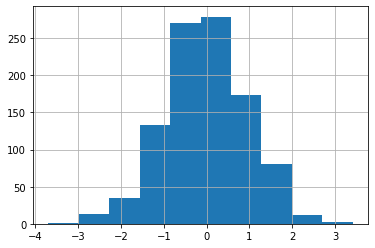

In [4]:
df1['A'].hist()
#you can specify plot styles with bins, kind, etc.
#you can also change graph style by importing seaborn

Call the style:

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Now your plots look like this:

<AxesSubplot:>

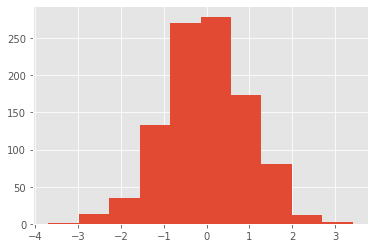

In [6]:
df1['A'].hist()

<AxesSubplot:>

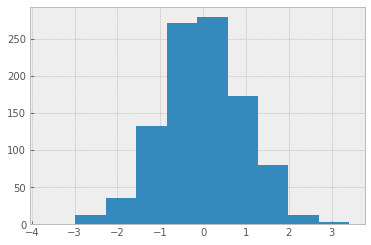

In [7]:
plt.style.use('bmh')
df1['A'].hist()

<AxesSubplot:>

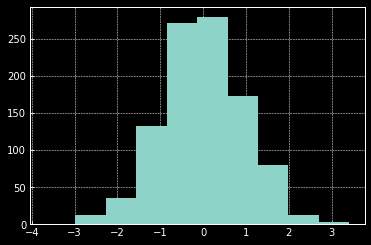

In [8]:
plt.style.use('dark_background')
df1['A'].hist()

<AxesSubplot:>

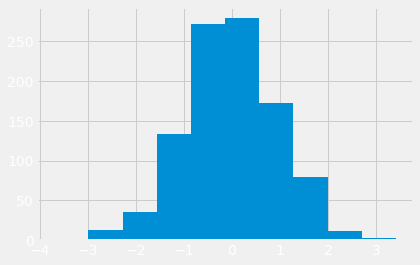

In [9]:
plt.style.use('fivethirtyeight')
df1['A'].hist()

In [10]:
plt.style.use('ggplot')

Let's stick with the ggplot style and actually show you how to utilize pandas built-in plotting capabilities!

# Plot Types

There are several plot types built-in to pandas, most of them statistical plots by nature:

* df.plot.area     
* df.plot.barh     
* df.plot.density  
* df.plot.hist     
* df.plot.line     
* df.plot.scatter
* df.plot.bar      
* df.plot.box      
* df.plot.hexbin   
* df.plot.kde      
* df.plot.pie

You can also just call df.plot(kind='hist') or replace that kind argument with any of the key terms shown in the list above (e.g. 'box','barh', etc..)
___

Let's start going through them!

## Area

<AxesSubplot:>

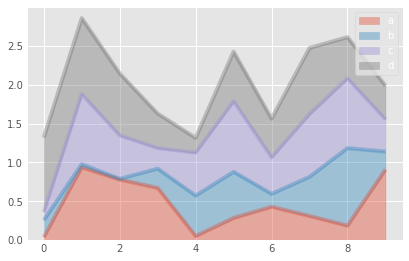

In [11]:
df2.plot.area(alpha=0.4)

## Barplots

In [12]:
df2.head()

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008


<AxesSubplot:>

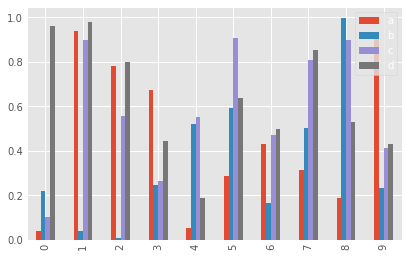

In [13]:
df2.plot.bar()

<AxesSubplot:>

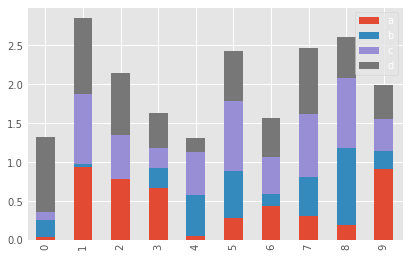

In [14]:
df2.plot.bar(stacked=True)

## Histograms

<AxesSubplot:ylabel='Frequency'>

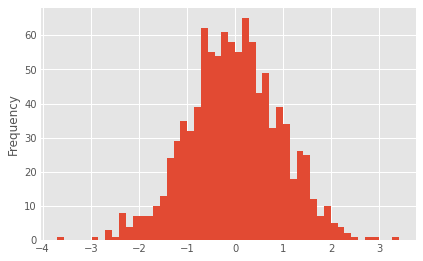

In [15]:
df1['A'].plot.hist(bins=50)

## Line Plots

In [16]:
df1.plot.line(x=df1.index,y='B',figsize=(12,3),lw=1)

KeyError: "None of [Index(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04', '2000-01-05',\n       '2000-01-06', '2000-01-07', '2000-01-08', '2000-01-09', '2000-01-10',\n       ...\n       '2002-09-17', '2002-09-18', '2002-09-19', '2002-09-20', '2002-09-21',\n       '2002-09-22', '2002-09-23', '2002-09-24', '2002-09-25', '2002-09-26'],\n      dtype='object', length=1000)] are in the [columns]"

## Scatter Plots

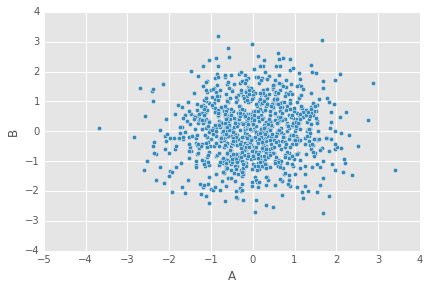

In [84]:
df1.plot.scatter(x='A',y='B')

You can use c to color based off another column value
Use cmap to indicate colormap to use. 
For all the colormaps, check out: http://matplotlib.org/users/colormaps.html

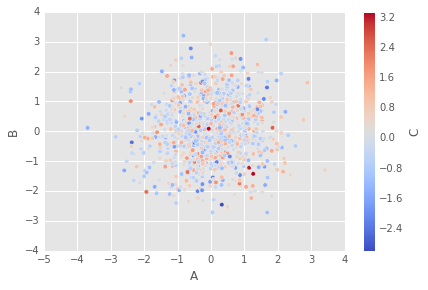

In [85]:
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm')

Or use s to indicate size based off another column. s parameter needs to be an array, not just the name of a column:

<AxesSubplot:xlabel='A', ylabel='B'>

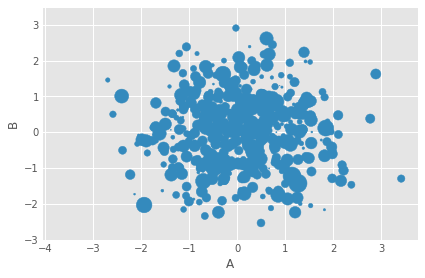

In [19]:
df1.plot.scatter(x='A',y='B',s=df1['C']*100)

## BoxPlots

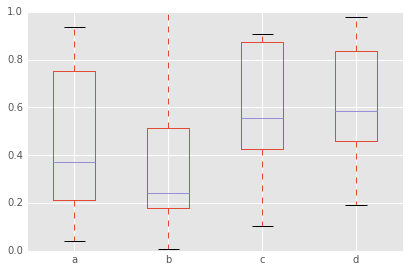

In [87]:
df2.plot.box() # Can also pass a by= argument for groupby

## Hexagonal Bin Plot

Useful for Bivariate Data, alternative to scatterplot:

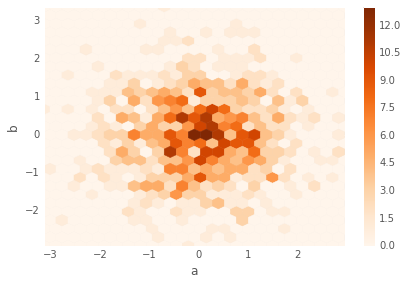

In [88]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='Oranges')

____

## Kernel Density Estimation plot (KDE)

<AxesSubplot:ylabel='Density'>

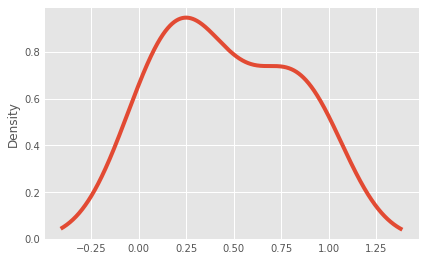

In [21]:
df2['a'].plot.kde()

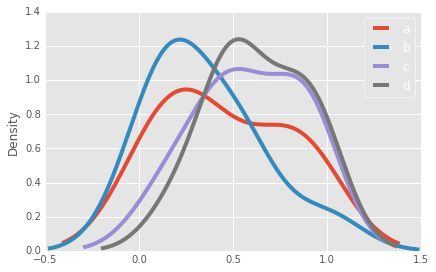

In [90]:
df2.plot.density()

In [21]:
df1.head()

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


<AxesSubplot:ylabel='Density'>

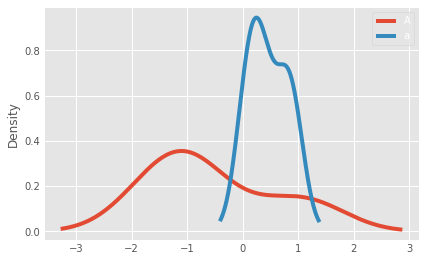

In [23]:
df1['Index'] = np.arange(0,len(df1))
df1.set_index('Index')
df2['Index'] = np.arange(0,len(df2))
df2.set_index('Index')
a=pd.merge(df1,df2,how='inner',on='Index')
a[['A','a']].plot.kde()

That's it! Hopefully you can see why this method of plotting will be a lot easier to use than full-on matplotlib, it balances ease of use with control over the figure. A lot of the plot calls also accept additional arguments of their parent matplotlib plt. call. 

Next we will learn about seaborn, which is a statistical visualization library designed to work with pandas dataframes well.

Before that though, we'll have a quick exercise for you!

# Great Job!